In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import sys
sys.path.append("..")

In [3]:
from src.plots import *

In [4]:
from src.url_csv import df_join

## Processing dataframes for EDA

In [5]:
df1 = pd.read_csv('../data/ht_match.csv')
df2 = pd.read_csv('../data/ht_match_ind.csv')

df3 = pd.read_csv('../data/ht_match_na.csv')
df4 = pd.read_csv('../data/ht_match_ind_na.csv')

df_eda = df_join(df1,df2, False)
df_temp = df_join(df3,df4, False)

In [19]:
df_eda = pd.concat([df_eda,df_temp])

In [20]:
df_eda.describe()

,match_id,win,totalGold,level,xp,totalKills,totalDeaths,level_ups
count,3.973800e+04,39738.000000,39738.000000,39738.000000,39738.000000,39738.000000,39738.000000,39738.000000
mean,3.890545e+09,0.500000,172233.570109,369.422065,181677.914465,18.723992,18.723992,83.450853
std,4.755858e+08,0.500006,88110.837081,161.616943,101749.266383,10.255432,10.255432,17.786681
min,3.414942e+09,0.000000,5000.000000,10.000000,0.000000,0.000000,0.000000,0.000000
25%,3.414991e+09,0.000000,107373.750000,250.000000,105727.000000,12.000000,12.000000,74.000000
50%,3.415034e+09,0.500000,159690.000000,359.000000,167273.500000,18.000000,18.000000,84.000000
75%,4.366151e+09,1.000000,221391.500000,467.000000,238748.250000,26.000000,26.000000,96.000000
max,4.366177e+09,1.000000,740829.000000,1260.000000,861045.000000,90.000000,90.000000,144.000000


In [58]:
(df_eda[['xp','totalKills']]==0).sum()

xp            521
totalKills    899
dtype: int64

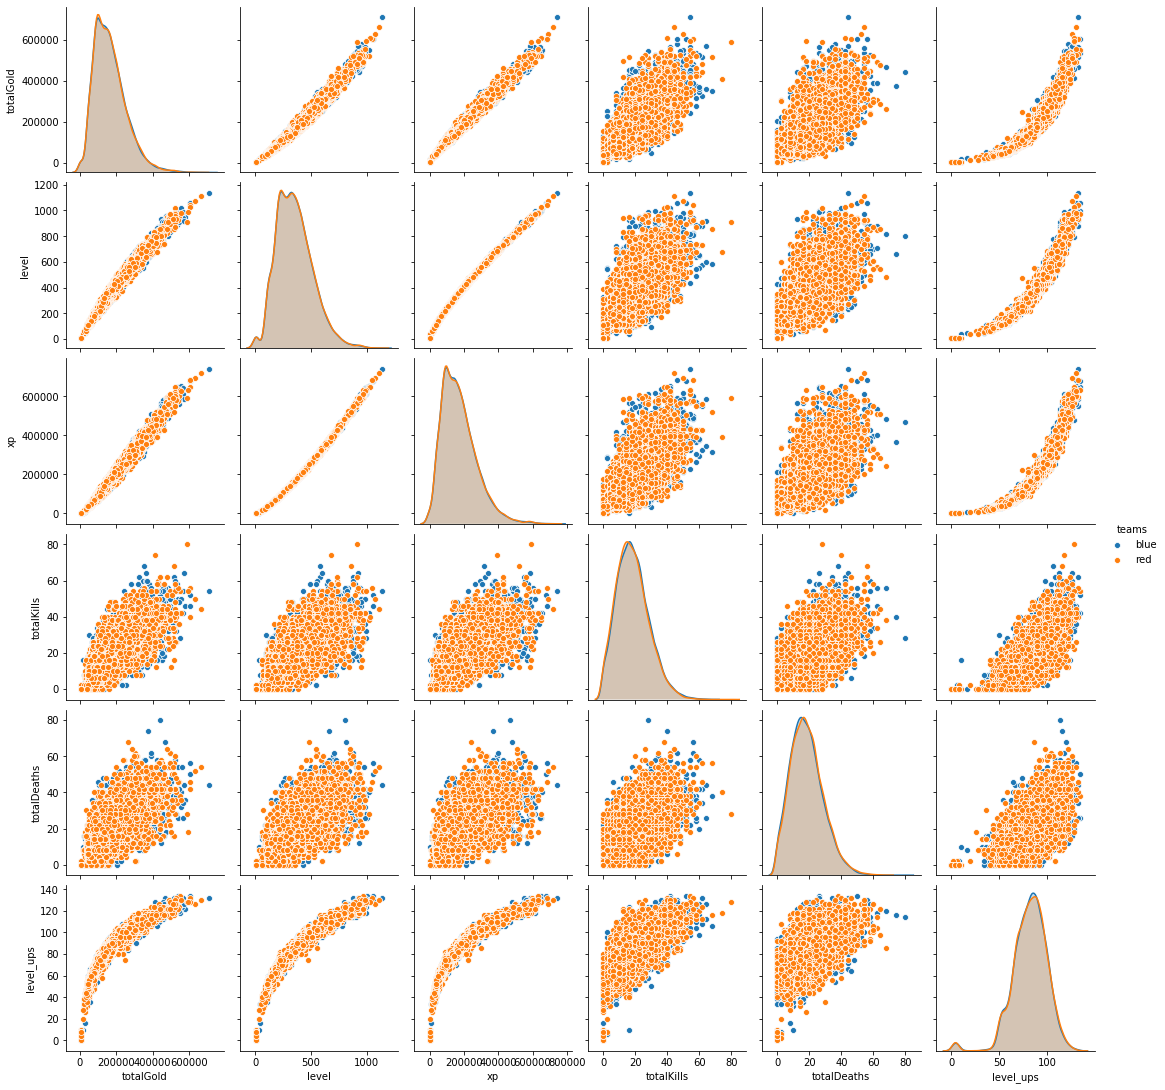

In [7]:
#pairplot_helper(df_eda.drop(columns=['match_id','win','firstBlood','firstTower','firstInhibitor','firstBaron','firstDragon','firstRiftHerald']))

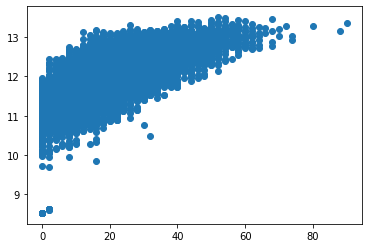

In [21]:
fig,ax = plt.subplots()

ax.scatter(df_eda['totalKills'],np.log(df_eda['totalGold']))
plt.show()

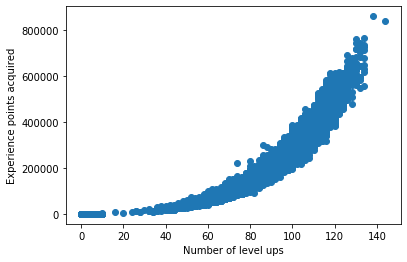

In [22]:
fig,ax = plt.subplots()

ax.scatter(df_eda['level_ups'],df_eda['xp'])

ax.set_ylabel('Experience points acquired')
ax.set_xlabel('Number of level ups')

plt.show()

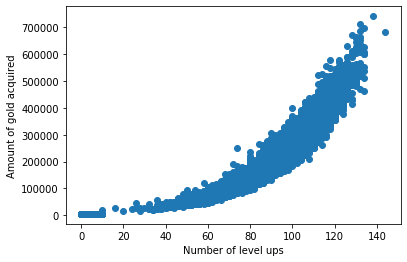

In [23]:
fig,ax = plt.subplots()

ax.scatter(df_eda['level_ups'],df_eda['totalGold'])

ax.set_ylabel('Amount of gold acquired')
ax.set_xlabel('Number of level ups')

plt.show()

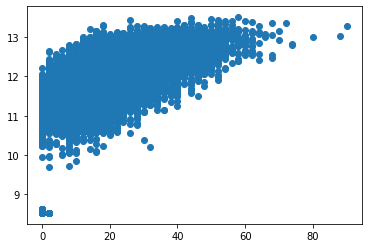

In [24]:
fig,ax = plt.subplots()

ax.scatter(df_eda['totalDeaths'],np.log(df_eda['totalGold']))
plt.show()

## Correlation matrix

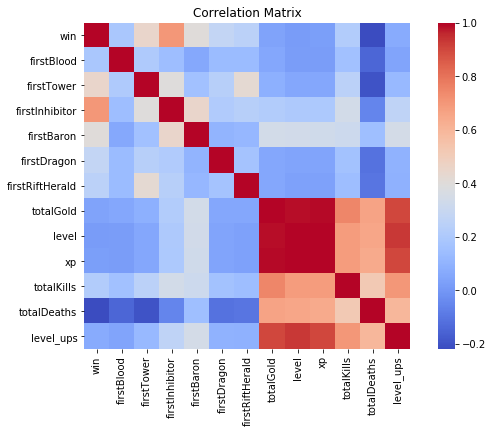

In [25]:
fig,ax = plt.subplots(figsize=(10,6))

correlation_plotter(ax,df_eda)

In [26]:
df_eda.groupby('teams').sum()['win'].values

array([10028,  9841])

## Red vs Blue win counts

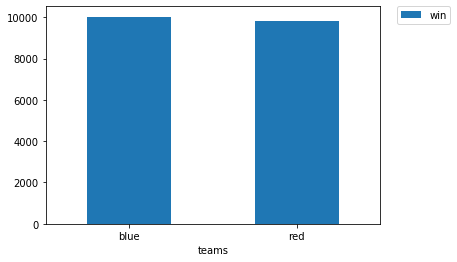

In [29]:
wins = df_eda.groupby('teams').sum()[['win']]
wins.plot.bar(rot=0)
plt.legend(bbox_to_anchor=(1.05,1),loc=2,borderaxespad=0)
plt.show()

## Average statisitics

In [52]:
aggregate_cols = df_eda.groupby('teams').mean().columns

In [53]:
win_rate = df_eda.groupby('teams').mean()['win']
win_rate

teams
blue    0.504706
red     0.495294
Name: win, dtype: float64

In [55]:
avg_kills_by_team = df_eda.groupby('teams').mean()[aggregate_cols].drop(columns = 'match_id')
avg_kills_by_team

,win,firstBlood,firstTower,firstInhibitor,firstBaron,firstDragon,firstRiftHerald,totalGold,level,xp,totalKills,totalDeaths,level_ups
teams,,,,,,,,,,,,,
blue,0.504706,0.503901,0.500780,0.418491,0.264281,0.494992,0.463033,172204.162062,369.127586,181397.588807,18.911470,18.536514,83.378529
red,0.495294,0.491872,0.484926,0.406865,0.294127,0.489557,0.435956,172262.978157,369.716543,181958.240123,18.536514,18.911470,83.523177


In [50]:
df_eda.groupby('teams').mean().columns

Index(['match_id', 'win', 'firstBlood', 'firstTower', 'firstInhibitor',
       'firstBaron', 'firstDragon', 'firstRiftHerald', 'totalGold', 'level',
       'xp', 'totalKills', 'totalDeaths', 'level_ups'],
      dtype='object')

In [ ]:
avg

In [46]:
df_eda.head(2)

,teams,match_id,win,firstBlood,firstTower,firstInhibitor,firstBaron,firstDragon,firstRiftHerald,totalGold,level,xp,totalKills,totalDeaths,level_ups
0,blue,4366059781,1,True,True,True,False,False,True,205374,420,207036,22,18,92
1,red,4366059781,0,False,False,False,False,True,False,191351,415,203735,18,22,90


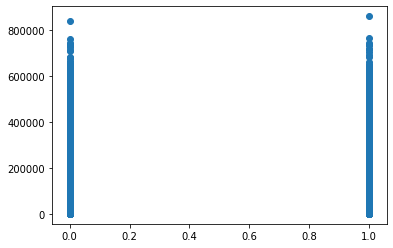

In [40]:
first_blood = df_eda.groupby('teams')['firstBlood'].sum()
first_blood

fig,ax = plt.subplots()

ax.scatter(df_eda['win'],df_eda['xp'])
plt.show()